In [1]:
import pandas as pd
import os
from D_oblique_decision_trees.evaluation.benchmark_runner import DepthSweepRunner
from D_oblique_decision_trees.visualisation import plot_tradeoff_for_oblique_tree
from src.load_shapes import load_all_shape_datasets

In [2]:
all_data = load_all_shape_datasets()

Starting CSV file loading process from ..\_data\shapes

Paired dataset 'barbell_2d': X shape (1500, 2), y shape (1500,)
Paired dataset 'barbell_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'radial_segment_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'radial_segment_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'rectangle_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'saddle_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'sine_wave_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'star_2d': X shape (5000, 2), y shape (5000,)

Datasets available: ['barbell_2d', 'barbell_3d', 'radial_segment_2d', 'radial_segment_3d', 'rectangle_2d', 'saddle_3d', 'sine_wave_2d', 'star_2d']


In [3]:
all_datasets_dict = {
    "barbell_2d": all_data["barbell_2d"],
    "sine_wave_2d": all_data["sine_wave_2d"],
    "star_2d": all_data["star_2d"],
    "radial_segment_2d": all_data["radial_segment_2d"],
    "rectangle_2d": all_data["rectangle_2d"],
    "barbell_3d": all_data["barbell_3d"],
    "radial_segment_3d": all_data["radial_segment_3d"],
    "saddle_3d": all_data["saddle_3d"]
}

runner = DepthSweepRunner(all_datasets_dict, max_depth=10)
depth_sweep_df = runner.run()
depth_sweep_df = runner.reorder_and_print(depth_sweep_df)

runner.save_results(depth_sweep_df, "depth_sweep.csv")

Depth Sweeping: 352it [1:39:17, 16.92s/it]                            


===== Depth Sweep Results =====

               dataset  data_dim algorithm  depth  accuracy  coverage  \
0           barbell_2d         2    hhcart      0  0.837333  0.000000   
1         sine_wave_2d         2    hhcart      0  0.923600  0.000000   
2              star_2d         2    hhcart      0  0.845000  0.000000   
3    radial_segment_2d         2    hhcart      0  0.691600  0.000000   
4         rectangle_2d         2    hhcart      0  0.749200  0.000000   
..                 ...       ...       ...    ...       ...       ...   
347  radial_segment_2d         2      wodt     10  0.708800  0.551232   
348       rectangle_2d         2      wodt     10  0.920200  0.940191   
349         barbell_3d         3      wodt     10  0.850400  0.281560   
350  radial_segment_3d         3      wodt     10  0.793500  0.424782   
351          saddle_3d         3      wodt     10  0.625000  0.214358   

      density   f_score  splits  leaves  avg_active_feature_count  \
0         NaN       

In [ ]:
datasets_2d_dict = {
  "barbell_2d": all_data["barbell_2d"],
  "sine_wave_2d": all_data["sine_wave_2d"],
  "star_2d": all_data["star_2d"],
  "radial_segment_2d": all_data["radial_segment_2d"],
  "rectangle_2d": all_data["rectangle_2d"]
}

runner = DepthSweepRunner(datasets_2d_dict, max_depth=10)
depth_sweep_2d_df = runner.run()
depth_sweep_2d_df = runner.reorder_and_print(depth_sweep_2d_df)

runner.save_results(depth_sweep_2d_df, "depth_sweep_2d.csv")

runner.plot_results(depth_sweep_2d_df, title="Accuracy vs. Depth (per 2D dataset)", metric="accuracy", 
                    x_lim=(0, 10), y_lim=(0.0, 1.0), xlabel="Depth", ylabel="Accuracy", save_name="separate_accuracy_2d.pdf")
runner.plot_aggregated_metric(depth_sweep_2d_df, title="Accuracy vs. Depth (averaged over 3D datasets)", metric="accuracy", 
                              x_lim=(0, 10), y_lim=(0.0, 1.0), xlabel="Depth", ylabel="Accuracy", save_name="aggregated_accuracy_2d.pdf")

In [ ]:
datasets_3d_dict = {
  "barbell_3d": all_data["barbell_3d"],
  "radial_segment_3d": all_data["radial_segment_3d"],
  "saddle_3d": all_data["saddle_3d"]
}

runner = DepthSweepRunner(datasets_3d_dict, max_depth=10)
depth_sweep_3d_df = runner.run()
depth_sweep_3d_df = runner.reorder_and_print(depth_sweep_3d_df)

runner.save_results(depth_sweep_3d_df, "depth_sweep_3d.csv")

Figure saved: ..\_data\depth_sweep_batch_results\separate_coverage_3d.pdf


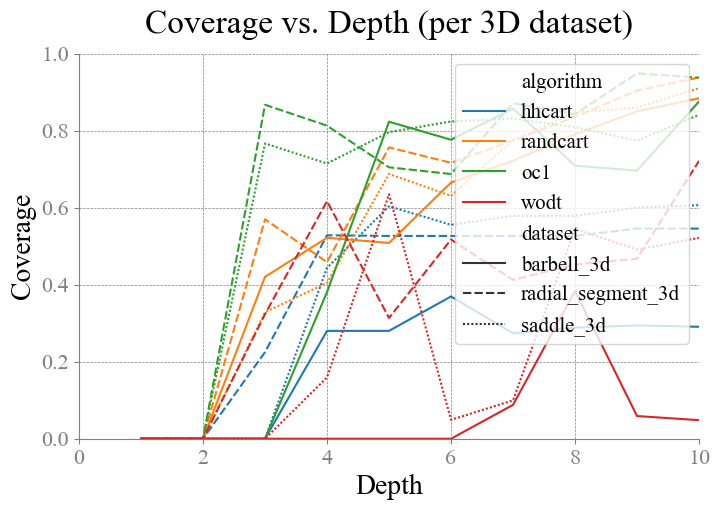

Figure saved: ..\_data\depth_sweep_batch_results\separate_density_3d.pdf


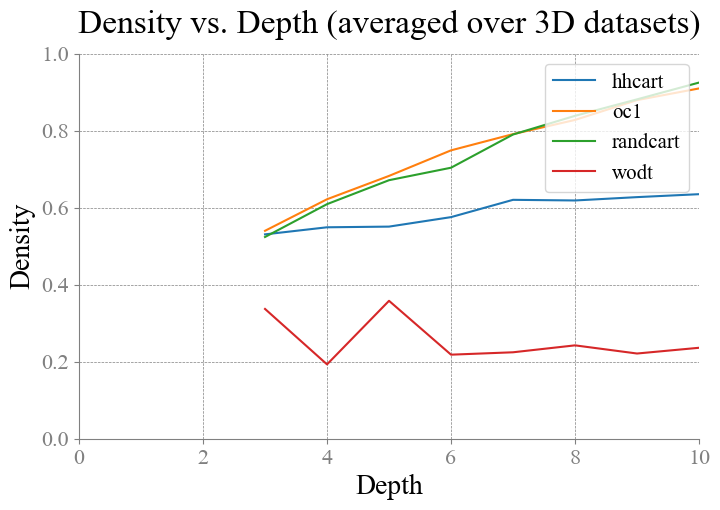

In [7]:
# Construct the file path using os.path.join (works on Windows, macOS, Linux)
data_dir = os.path.join("..", "_data", "depth_sweep_batch_results")
filename = "depth_sweep_3d.csv"  
results_file = os.path.join(data_dir, filename)

# Load the CSV file
depth_sweep_3d_df = pd.read_csv(results_file)

# Plot the results
DepthSweepRunner.plot_results(depth_sweep_3d_df, title="Coverage vs. Depth (per 3D dataset)", metric="coverage", 
                    x_lim=(0, 10), y_lim=(0.0, 1.0), xlabel="Depth", ylabel="Coverage", save_name="separate_coverage_3d.pdf")

DepthSweepRunner.plot_aggregated_metric(depth_sweep_3d_df, title="Density vs. Depth (averaged over 3D datasets)", metric="density",
                              x_lim=(0, 10), y_lim=(0.0, 1.0), xlabel="Depth", ylabel="Density",
                              save_name="separate_density_3d.pdf")

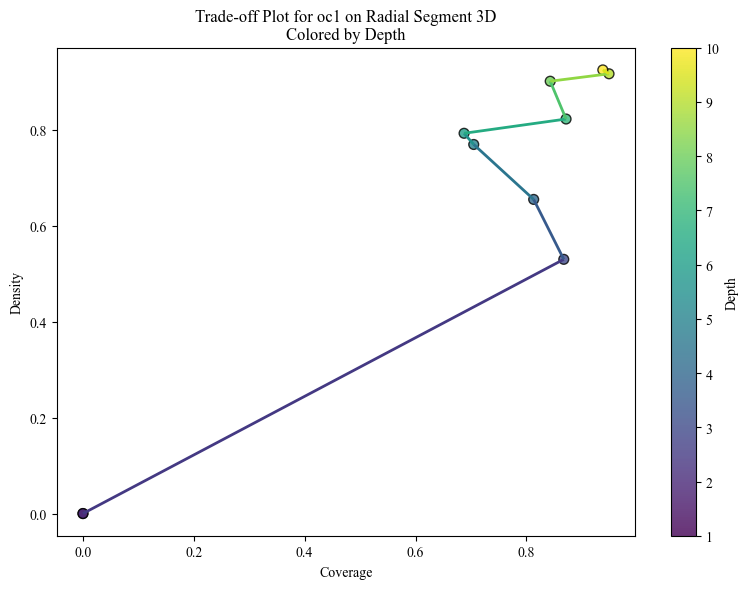

In [22]:

# Example usage:
data_dir = os.path.join("..", "_data", "depth_sweep_batch_results")
filename = "depth_sweep_3d.csv"  
results_file = os.path.join(data_dir, filename)

# Load the CSV file into a DataFrame.
results_df = pd.read_csv(results_file)

# To plot for algorithm "oc1" on dataset "radial_segment_3d" with color mapping based on "depth":
plot_tradeoff_for_oblique_tree(results_df, "oc1", "radial_segment_3d", color_metric="depth", cmap="viridis")